## Assignment 4

### 1. Reading csv

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("hotel_bookings.csv")

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2.0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1.0,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1.0,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2.0,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


### 2. Data Inspection and Cleaning:

Check missing

In [6]:
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [5]:
data.fillna(0, inplace=True)

check duplicate

In [9]:
data.duplicated().sum()

0

In [8]:
data.drop_duplicates(inplace=True)

Identify and handle outliers

In [10]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [16]:
numerical_columns = ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number',
                     'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights',
                     'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations',
                     'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list',
                     'adr', 'required_car_parking_spaces', 'total_of_special_requests']

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')

    # Optionally, remove outliers
    # df = df[~((data[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

Number of outliers in is_canceled: 0
Number of outliers in lead_time: 2400
Number of outliers in arrival_date_year: 0
Number of outliers in arrival_date_week_number: 0
Number of outliers in arrival_date_day_of_month: 0
Number of outliers in stays_in_weekend_nights: 220
Number of outliers in stays_in_week_nights: 1531
Number of outliers in adults: 22901
Number of outliers in children: 8364
Number of outliers in babies: 914
Number of outliers in is_repeated_guest: 3415
Number of outliers in previous_cancellations: 1685
Number of outliers in previous_bookings_not_canceled: 3545
Number of outliers in booking_changes: 15903
Number of outliers in agent: 0
Number of outliers in company: 5259
Number of outliers in days_in_waiting_list: 862
Number of outliers in adr: 2490
Number of outliers in required_car_parking_spaces: 7313
Number of outliers in total_of_special_requests: 2673


Check for inconsistencies

In [17]:
for col in data.select_dtypes(include='object').columns:
    print(f'Value counts for {col}:')
    print(data[col].value_counts())

Value counts for hotel:
hotel
City Hotel      53439
Resort Hotel    33972
Name: count, dtype: int64
Value counts for arrival_date_month:
arrival_date_month
August       11259
July         10059
May           8355
April         7908
June          7765
March         7513
October       6945
September     6690
February      6098
December      5131
November      4995
January       4693
Name: count, dtype: int64
Value counts for meal:
meal
BB           67992
SC            9481
HB            9086
Undefined      492
FB             360
Name: count, dtype: int64
Value counts for country:
country
PRT    27459
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
BFA        1
PYF        1
GUY        1
LCA        1
SLE        1
Name: count, Length: 178, dtype: int64
Value counts for market_segment:
market_segment
Online TA        51619
Offline TA/TO    13891
Direct           11805
Groups            4950
Corporate         4213
Complementary      702
Aviation           227
0               

### 3. Descriptive Statistics:

Calculate summary statistics

In [18]:
data[numerical_columns].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000,87411.000000
mean,0.275000,79.920662,2016.210214,26.840581,15.816202,1.005171,2.625299,1.875782,0.138610,0.010822,0.039068,0.030408,0.183959,0.271591,80.998284,11.014918,0.758383,106.336547,0.084211,0.698459
std,0.446517,86.099619,0.686096,13.674663,8.834850,1.031911,2.053468,0.626487,0.455836,0.113587,0.193759,0.369114,1.731747,0.727250,109.941346,54.043039,10.187359,55.012304,0.281511,0.831922
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
data['is_canceled'].mean()

0.27499971399480616

In [12]:
data['lead_time'].median()

49.0

In [13]:
data['arrival_date_year'].mode()

0    2016
Name: arrival_date_year, dtype: int64

In [14]:
data['adults'].std()

0.626487415664947

Display value counts and frequencies for categorical columns

In [15]:
categorical_columns = ['hotel', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest',
                       'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company',
                       'customer_type', 'reservation_status']

for col in categorical_columns:
    print(f'Value counts for {col}:')
    print(data[col].value_counts())

Value counts for hotel:
hotel
City Hotel      53439
Resort Hotel    33972
Name: count, dtype: int64
Value counts for country:
country
PRT    27459
GBR    10433
FRA     8837
ESP     7252
DEU     5387
       ...  
BFA        1
PYF        1
GUY        1
LCA        1
SLE        1
Name: count, Length: 178, dtype: int64
Value counts for market_segment:
market_segment
Online TA        51619
Offline TA/TO    13891
Direct           11805
Groups            4950
Corporate         4213
Complementary      702
Aviation           227
0                    2
Undefined            2
Name: count, dtype: int64
Value counts for distribution_channel:
distribution_channel
TA/TO        69153
Direct       12989
Corporate     5082
GDS            181
Undefined        5
0                1
Name: count, dtype: int64
Value counts for is_repeated_guest:
is_repeated_guest
0    83996
1     3415
Name: count, dtype: int64
Value counts for reserved_room_type:
reserved_room_type
A    56564
D    17397
E     6051
F     2824
G

### 4. Data Visualization:

Histogram 

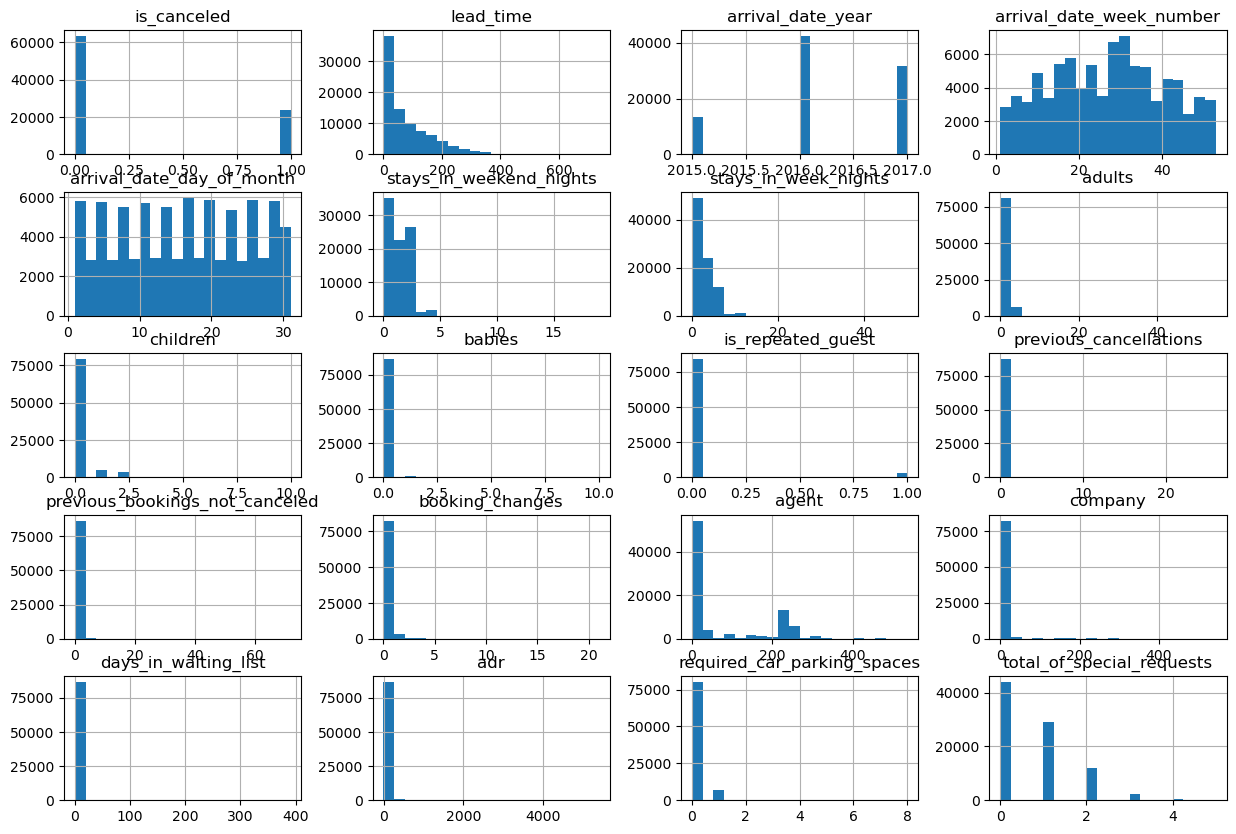

In [20]:
data[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.show()

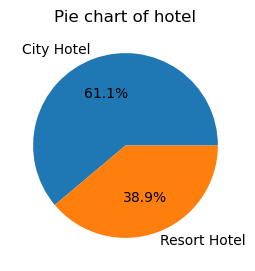

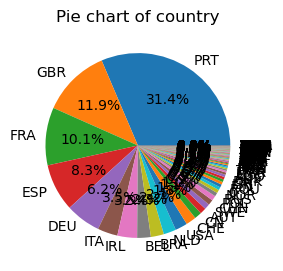

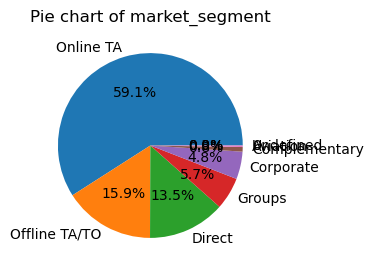

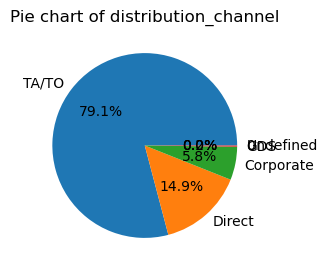

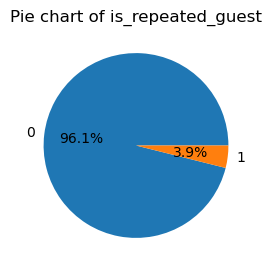

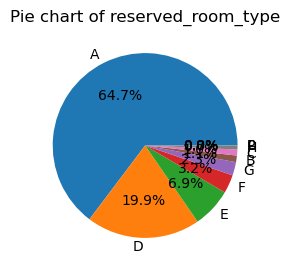

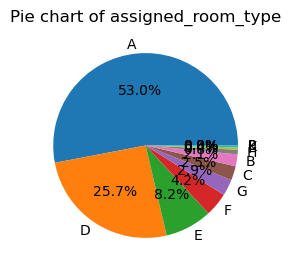

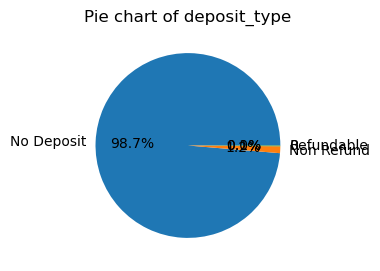

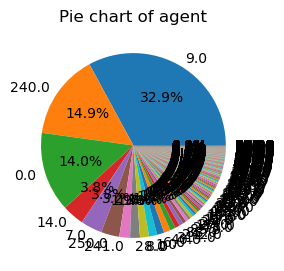

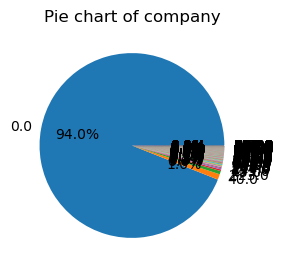

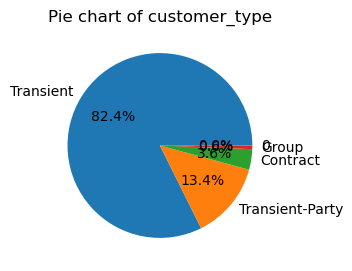

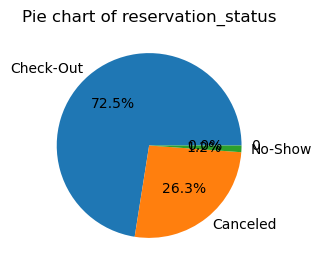

In [22]:
for col in categorical_columns:
    data[col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(3, 3))
    plt.title(f'Pie chart of {col}')
    plt.ylabel('')
    plt.show()

Use line plots to visualize trends over time

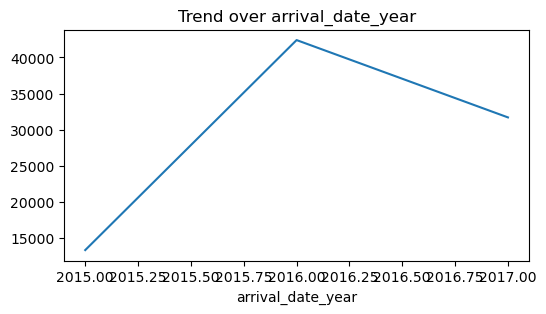

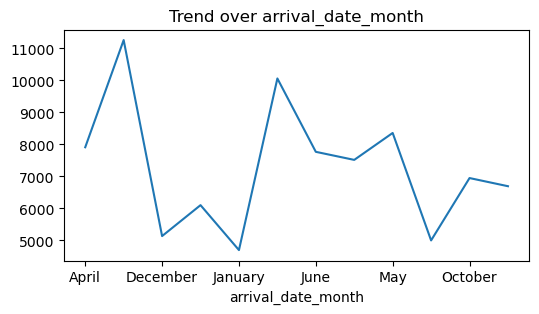

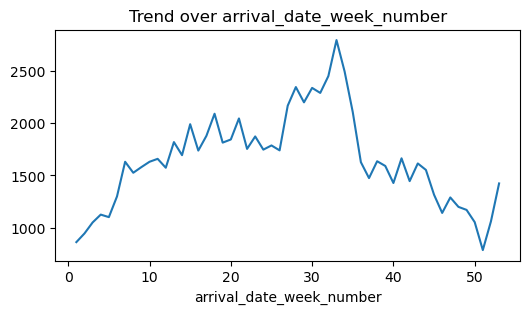

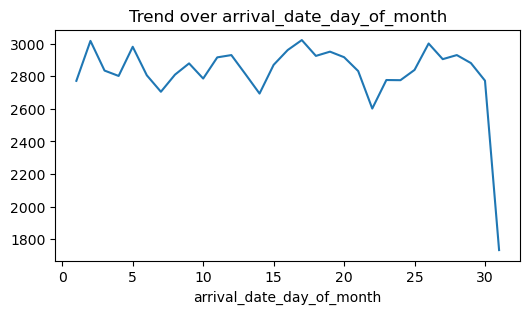

In [24]:
time_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

for col in time_columns:
    data.groupby(col).size().plot(kind='line', figsize=(6, 3))
    plt.title(f'Trend over {col}')
    plt.show()

### 5. Correlation Analysis:

Calculate the correlation matrix

In [32]:
data[numerical_columns].corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.185149,0.087865,0.001675,0.005432,0.059979,0.082824,0.081750,0.067286,-0.020560,-0.089670,0.051439,-0.052167,-0.093730,-0.000994,-0.074789,0.005797,0.127939,-0.184236,-0.120683
lead_time,0.185149,1.000000,0.138967,0.101507,0.010156,0.234681,0.309815,0.140381,0.028528,-0.003644,-0.146978,0.005343,-0.078917,0.076960,0.080149,-0.079195,0.133653,0.023303,-0.086587,0.033928
arrival_date_year,0.087865,0.138967,1.000000,-0.514211,-0.010025,0.005154,0.003671,0.038660,0.041191,-0.023321,0.024365,-0.054198,0.027266,0.008633,-0.001903,0.021292,-0.027724,0.176000,-0.039768,0.064336
arrival_date_week_number,0.001675,0.101507,-0.514211,1.000000,0.093682,0.026744,0.027745,0.024356,0.013399,0.014243,-0.036889,0.007184,-0.020835,0.011894,0.019502,-0.022658,0.014633,0.098210,0.008896,0.046457
arrival_date_day_of_month,0.005432,0.010156,-0.010025,0.093682,1.000000,-0.017852,-0.028199,-0.001180,0.015797,-0.000400,-0.004193,-0.008544,0.000144,0.006300,0.006067,-0.000502,0.006986,0.022512,0.009144,-0.001708
stays_in_weekend_nights,0.059979,0.234681,0.005154,0.026744,-0.017852,1.000000,0.555559,0.088272,0.028586,0.013675,-0.106922,-0.020627,-0.056639,0.050387,0.158465,-0.090436,-0.031990,0.039011,-0.042890,0.032480
stays_in_week_nights,0.082824,0.309815,0.003671,0.027745,-0.028199,0.555559,1.000000,0.095566,0.030492,0.016013,-0.113530,-0.018777,-0.058496,0.085060,0.190077,-0.065735,0.001609,0.053291,-0.044288,0.037875
adults,0.081750,0.140381,0.038660,0.024356,-0.001180,0.088272,0.095566,1.000000,0.023717,0.016641,-0.171698,-0.042093,-0.120903,-0.048037,0.029595,-0.174439,-0.015296,0.248982,0.007808,0.112735
children,0.067286,0.028528,0.041191,0.013399,0.015797,0.028586,0.030492,0.023717,1.000000,0.017428,-0.045640,-0.019203,-0.029418,0.031315,0.042049,-0.051037,-0.020336,0.326276,0.036347,0.044633
babies,-0.020560,-0.003644,-0.023321,0.014243,-0.000400,0.013675,0.016013,0.016641,0.017428,1.000000,-0.012974,-0.005393,-0.009191,0.081029,0.028953,-0.011425,-0.006806,0.023445,0.030889,0.094827


Visualize the correlation matrix using a heatmap

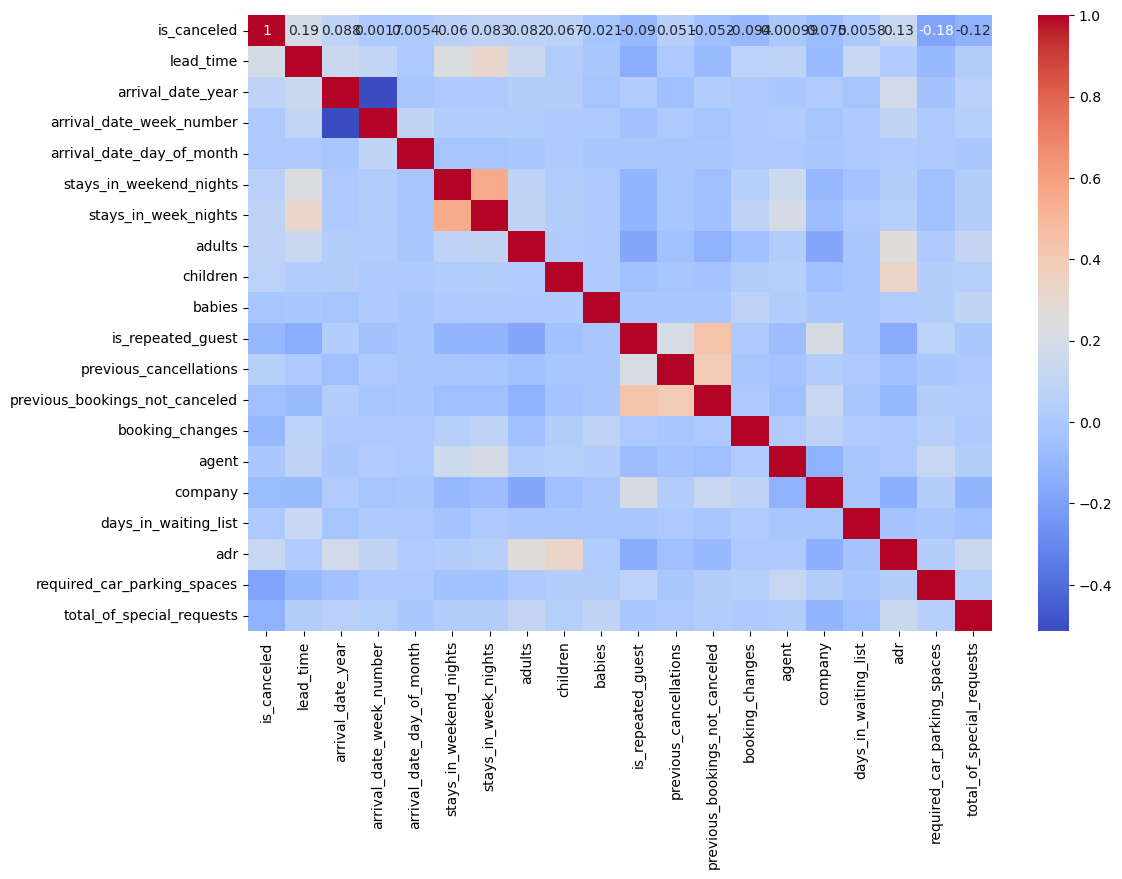

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.show()

### 6. Categorical Data Analysis:

Perform one-hot encoding

In [36]:
data_encoded = pd.get_dummies(data, columns=categorical_columns)

Analyze categorical columns

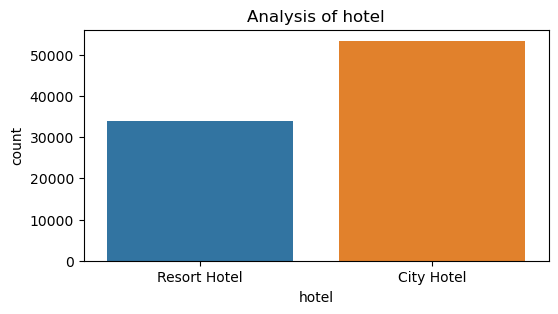

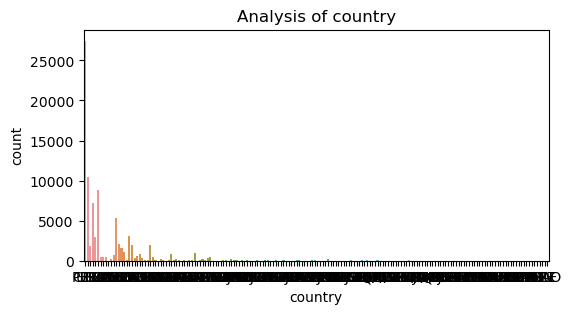

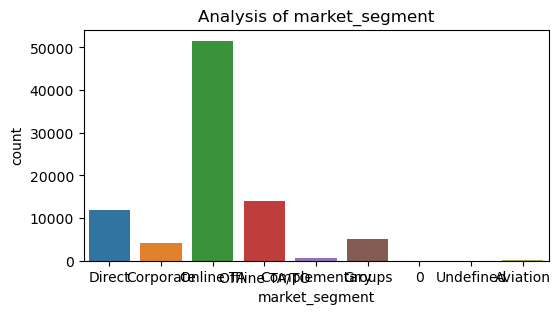

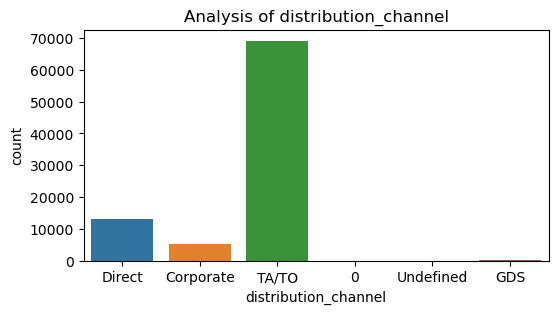

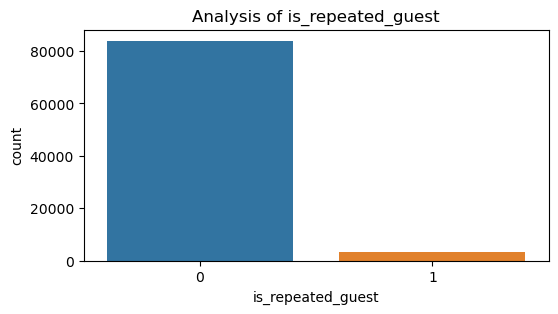

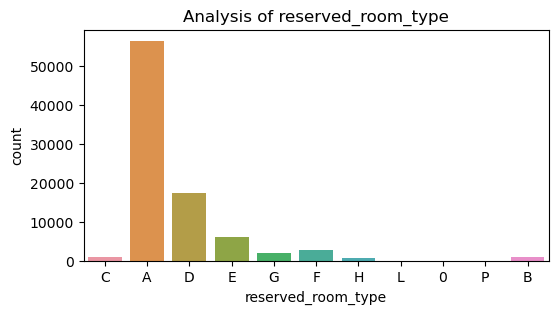

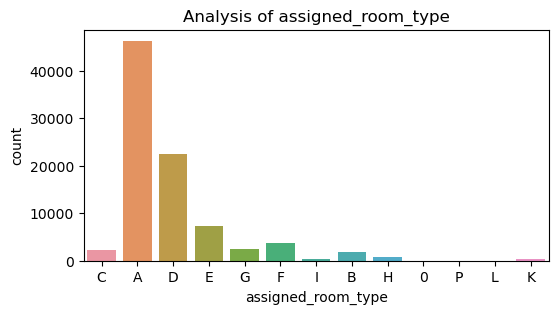

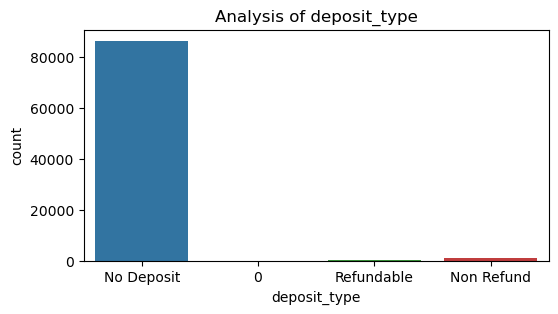

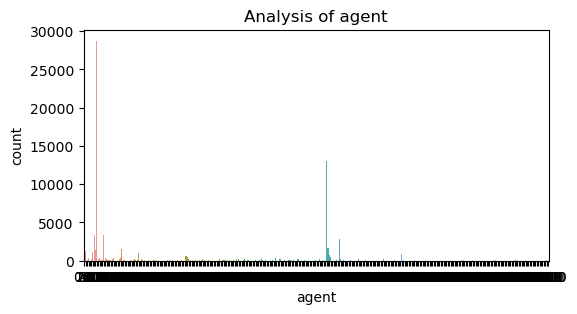

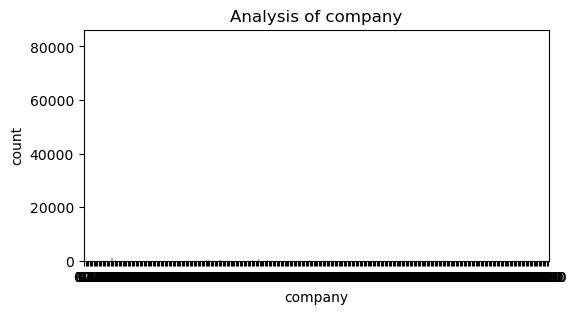

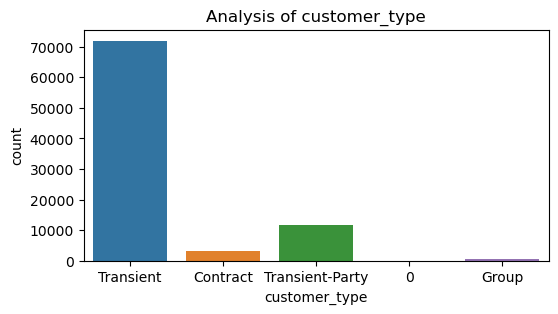

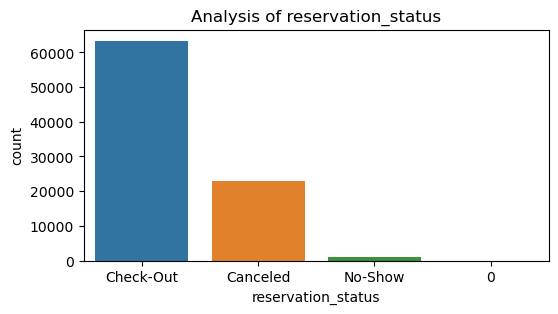

In [38]:
for col in categorical_columns:
    plt.figure(figsize=(6, 3))
    sns.countplot(x=data[col])
    plt.title(f'Analysis of {col}')
    plt.show()

Create contingency tables

### 7. Time Series Analysis:

Analyze seasonality

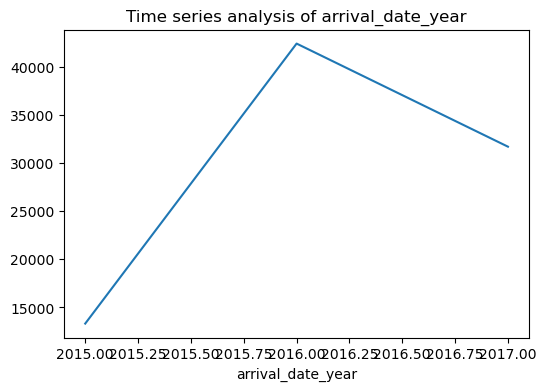

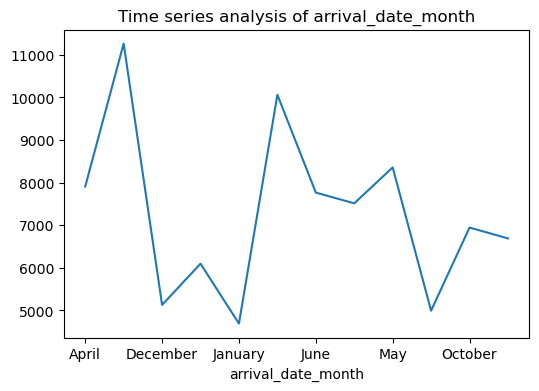

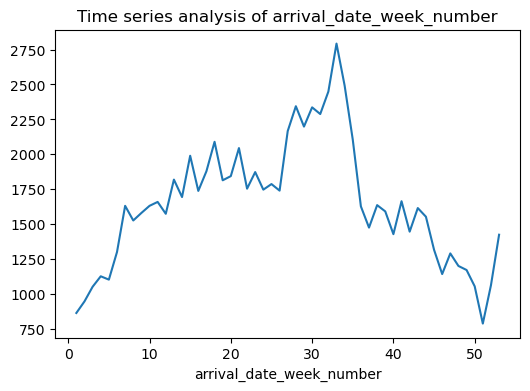

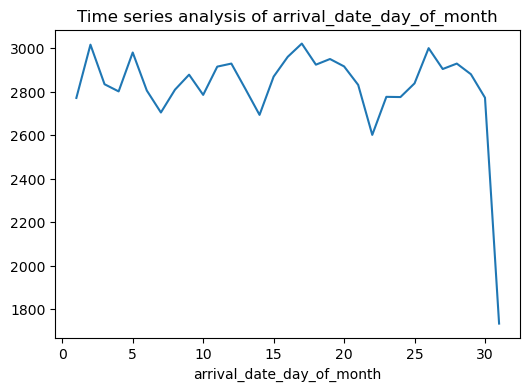

In [41]:
time_series_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month']

for col in time_series_columns:
    data.groupby(col).size().plot(kind='line', figsize=(6, 4))
    plt.title(f'Time series analysis of {col}')
    plt.show()

Create time series plots

### 8. Feature Engineering:

Create new features based on existing columns

In [43]:
data['duration_of_stay'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# df['arrival_month_name'] = df['arrival_date_month'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%B'))
# df['arrival_day_of_week'] = df['arrival_date_day_of_month'].apply(lambda x: pd.to_datetime(x, format='%d').strftime('%A'))

In [47]:
data['duration_of_stay'].describe()

count    87411.000000
mean         3.630470
std          2.763336
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         69.000000
Name: duration_of_stay, dtype: float64

### 9. Handling Datetime Columns:

Convert the reservation_status_date column to datetime format

In [50]:
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], dayfirst=True)

In [51]:
data['reservation_status_date']

0        2015-07-01
1        2015-07-01
2        2015-07-02
3        2015-07-02
4        2015-07-03
            ...    
119385   2017-09-06
119386   2017-09-07
119387   2017-09-07
119388   2017-09-07
119389   2017-09-07
Name: reservation_status_date, Length: 87411, dtype: datetime64[ns]

Extract additional features from the datetime column

In [53]:
data['reservation_status_day_of_week'] = data['reservation_status_date'].dt.day_name()
data['reservation_status_month'] = data['reservation_status_date'].dt.month
data['reservation_status_hour'] = data['reservation_status_date'].dt.hour

In [54]:
data['reservation_status_day_of_week']
data['reservation_status_month']
data['reservation_status_hour']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: reservation_status_hour, Length: 87411, dtype: int32